In [1]:
import getpass
import os
#os.system("echo '%s' | kinit" % getpass.getpass())

In [2]:
%matplotlib inline


from beauty import Beauty
import datetime as dt
import matplotlib.pyplot as plt


In [3]:
beauty = None
beauty = Beauty('https://vm-atlas-tdaq-cc.cern.ch/tbed/pbeast/api/')

since = dt.datetime(2016, 7, 18, 10, 20, 0)
till = dt.datetime(2016, 7, 19, 7, 30, 0)

Text(0, 0.5, 'L1 Rate (Hz)')

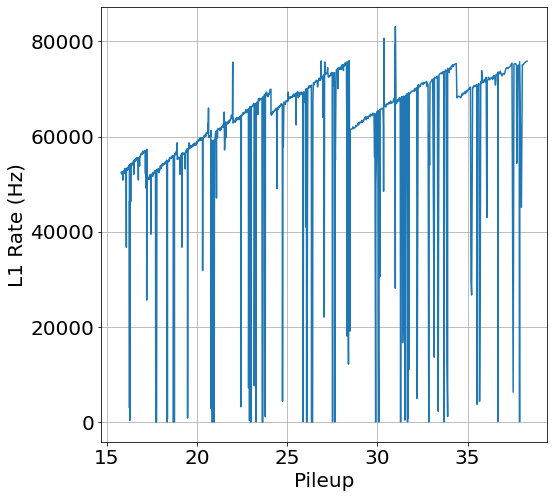

In [4]:
# L1 Rate versus Pileup

l1rate = beauty.timeseries(since, till, 'ATLAS', 'HLTSV', 'Rate')[0]

pileup = beauty.timeseries(since, till, 'OLC', 'OCLumi', 'Mu', 'OLC.OLCApp/ATLAS_PREFERRED_LBAv_PHYS')[0]

l1_mu = l1rate.correlate(pileup)

plt.figure(figsize=(8,8))

l1_mu.plot()

plt.xlabel('Pileup')

plt.ylabel('L1 Rate (Hz)')


DF.ROS.ROS-LAR-EMBA-00.ReadoutModule0
Number of channels 12


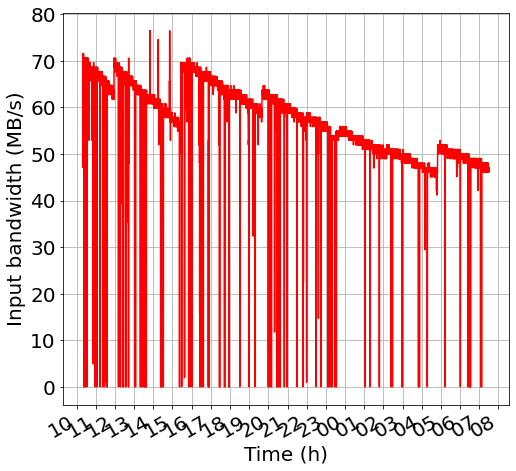

In [5]:
# Arrays
import pytz
import matplotlib.dates as mdates

one_element = beauty.timeseries(since, till, 'ATLAS', 'RobinNPDescriptorReadoutModuleInfo', 'rolInputBandwidth',
                                source='DF.ROS.ROS-LAR-EMBA-00.ReadoutModule.*', array_index=5)

module0 = one_element[0][5]
print(module0.name)

plt.figure(figsize=(8,8))

module0.plot(color='r')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H', tz=pytz.timezone('Europe/Zurich')))
ax.set_ylabel('Input bandwidth (MB/s)')
ax.set_xlabel('Time (h)')


all_elements = beauty.timeseries(since, till, 'ATLAS', 'RobinNPDescriptorReadoutModuleInfo', 'rolInputBandwidth',
                                 source='DF.ROS.ROS-LAR-EMBA-00.ReadoutModule0')[0]

print('Number of channels', len(all_elements.arrays))



In [6]:
# Nested types

busy = beauty.timeseries(since, till, 'ATLAS', 'CtpBusyInfo', 'ctpcore_objects/CtpcoreBusyInfoObject/fraction',
                         source='L1CT.CTP.Instantaneous.BusyFractions/ctpcore_objects.*')



Text(0.5, 0, 'pileup')

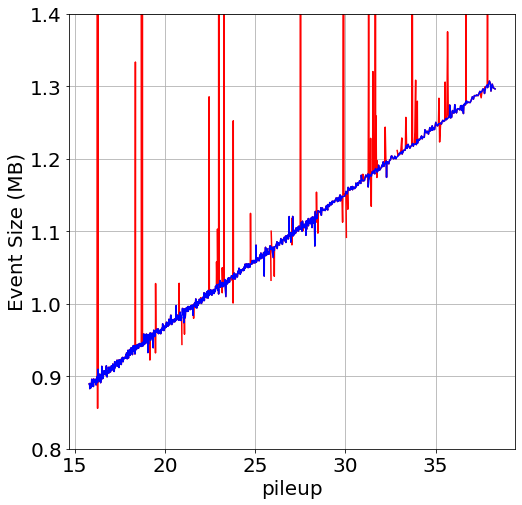

In [7]:
writing_r = beauty.timeseries(since, till, 'ATLAS', 'SFOngCounters', 'WritingEventRate',
                              source='DF.TopMIG-IS:HLT.Counters.physics_Main')[0]

writing_b = beauty.timeseries(since, till, 'ATLAS', 'SFOngCounters', 'WritingDataRate',
                              source='DF.TopMIG-IS:HLT.Counters.physics_Main')[0]

busy = beauty.timeseries(since, till, 'ATLAS', 'CtpBusyInfo', 'ctpcore_objects/CtpcoreBusyInfoObject/fraction',
                         source='L1CT.CTP.Instantaneous.BusyFractions/ctpcore_objects[9]', regex=False)[0]
    
writing_r = writing_r.correlate(pileup)
writing_b = writing_b.correlate(pileup)
busy = busy.correlate(pileup)

event_size = writing_b/writing_r/1000./1000.
masked_event_size = event_size[busy < 0.05]

plt.figure(figsize=(8,8))
event_size.plot(color='r')
masked_event_size.plot(color='blue')
plt.ylim(0.8,1.4)

plt.ylabel('Event Size (MB)')
plt.xlabel('pileup')